In [ ]:
from __future__ import unicode_literals, absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shutil

import json

import progressbar

In [ ]:
DIR = os.getcwd()

DATA = os.path.join(DIR, 'data')

In [ ]:
character_list = next(os.walk('./data/'))[1] # please do not print this directly
character_list = [x for x in character_list if x != 'train']
character_list = [x for x in character_list if x != 'test']

char_hash = {}

with open('data.json', 'r') as fp:
    char_hash = json.load(fp)

character_list = list(char_hash.keys())

character_count = len(character_list)

print(character_list[0:10])
print(character_count)

for i in character_list[27518:]:
    small_path = './data/' + i + '/'
    example_list = []
    for (dirpath, dirnames, filenames) in os.walk(small_path):
        example_list.extend(filenames)
        break
    try:
        os.rename(small_path, "./data/" + str(char_hash[i]) + '/')
    finally:
        pass
    #print([i + '\\' + x for x in example_list if x != None])
    #print(len(example_list))
    # roughly 130 each?
    
'''
small_path = './data/' + '的' + '/'
example_list = []
for (dirpath, dirnames, filenames) in os.walk(small_path):
    example_list.extend(filenames)
    break
# print(example_list[0:10])
print(len(example_list))
# common 1300
'''


In [ ]:
with open('data.json', 'w') as fp:
    json.dump(char_hash, fp)

In [ ]:
for i in range(20):
    print(character_list[i], char_hash[character_list[i]])

In [116]:
train_dir = os.path.join(DATA, 'train_small')
test_dir = os.path.join(DATA, 'test_small')

'''
for i in range(len(character_list)):
    os.mkdir(os.path.join(train_dir, str(i)))
    os.mkdir(os.path.join(test_dir, str(i)))
'''

'\nfor i in range(len(character_list)):\n    os.mkdir(os.path.join(train_dir, str(i)))\n    os.mkdir(os.path.join(test_dir, str(i)))\n'

In [ ]:
counter = 0;

test_count = 0;
train_count = 0;


ratio = []

bad = []

with progressbar.ProgressBar(widgets=[progressbar.Bar()]) as bar:
    for index, value in enumerate(character_list):
        character_dir = os.path.join(DATA, str(char_hash[value]))
        picture_list = []
        for (dirpath, dirnames, filenames) in os.walk(character_dir):
            picture_list.extend(filenames)
            break
        for picture in picture_list:
            if (counter % 5 == 0):
                try:
                    shutil.move(os.path.join(character_dir, picture), os.path.join(os.path.join(test_dir, str(char_hash[value]), picture)))
                    test_count += 1
                finally:
                    test_count += 0
            else:
                try:
                    shutil.move(os.path.join(character_dir, picture), os.path.join(os.path.join(train_dir, str(char_hash[value]), picture)))
                    train_count += 1
                finally:
                    test_count += 0
            counter += 1
        bad.append(counter - test_count - train_count)
        ratio.append(test_count/counter)
        counter = 0
        test_count = 0
        train_count = 0
        bar.update(int(i / 10), force=True)


In [ ]:
print(bad[10000:10005])
print(ratio[10000:10005])

In [ ]:
'''
train_healthy_dir = os.path.join(train_dir, 'healthy')  # directory with our training cat pictures
train_distressed_dir = os.path.join(train_dir, 'distressed')  # directory with our training dog pictures
validation_healthy_dir = os.path.join(validation_dir, 'healthy')  # directory with our validation cat pictures
validation_distressed_dir = os.path.join(validation_dir, 'distressed')  # directory with our validation dog pictures

num_hea_tr = len(os.listdir(train_healthy_dir))
num_dis_tr = len(os.listdir(train_distressed_dir))
num_hea_val = len(os.listdir(validation_healthy_dir))
num_dis_val = len(os.listdir(validation_distressed_dir))

total_train = num_dis_tr + num_hea_tr
total_val = num_dis_val + num_hea_val

print(total_train)
print(total_val)

print(validation_distressed_dir)
'''

In [ ]:
batch_size = 128
epochs = 3
IMG_HEIGHT = 28
IMG_WIDTH = 28

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [ ]:
common = pd.read_csv('hanziDB.csv')
#print(list(common['charcter'][:1000]))

authority = list(common['charcter'][:1000])

authority_num = []

for i in authority:
    authority_num.append(char_hash[i])

In [ ]:
print(authority_num)


for i in authority_num:
    os.mkdir(os.path.join(train_dir, str(i)))
    os.mkdir(os.path.join(test_dir, str(i)))

In [115]:
counter = 0;

test_count = 0;
train_count = 0;


otrain_dir = os.path.join(DATA, 'train')
otest_dir = os.path.join(DATA, 'test')

ratio = []

bad = []

for index, value in enumerate(authority_num):
    character_train_dir = os.path.join(otrain_dir, str(value))
    picture_list = []
    for (dirpath, dirnames, filenames) in os.walk(character_train_dir):
        picture_list.extend(filenames)
        break
    for picture in picture_list:
        shutil.copy(os.path.join(character_train_dir, picture), os.path.join(os.path.join(train_dir, str(value)), picture))
    character_test_dir = os.path.join(otest_dir, str(value))
    picture_list = []
    for (dirpath, dirnames, filenames) in os.walk(character_test_dir):
        picture_list.extend(filenames)
        break
    for picture in picture_list:
        shutil.copy(os.path.join(character_test_dir, picture), os.path.join(os.path.join(test_dir, str(value)), picture))
              


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\matth\\Documents\\gh\\Chinese\\data\\train_small\\12699\\Adorkable boyhood Font-Simplified Chinesettf.png'

In [117]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')


Found 96790 images belonging to 100 classes.


In [118]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 24248 images belonging to 100 classes.


In [119]:
sample_training_images, _ = next(train_data_gen)


In [120]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [121]:
'''
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
'''

'\nimage_gen_train = ImageDataGenerator(\n                    rescale=1./255,\n                    rotation_range=45,\n                    width_shift_range=.15,\n                    height_shift_range=.15,\n                    horizontal_flip=True,\n                    zoom_range=0.5\n                    )\n'

In [122]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')


Found 96790 images belonging to 100 classes.


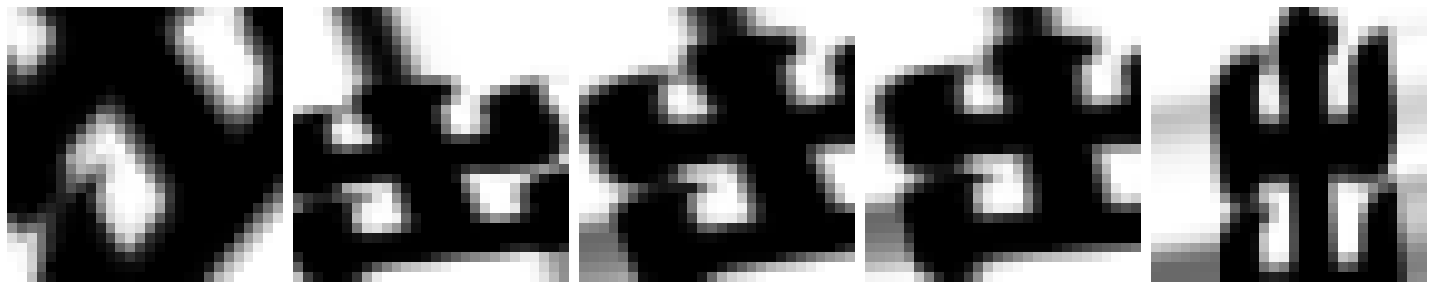

In [123]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [124]:
image_gen_val = ImageDataGenerator(rescale=1./255)


In [125]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=test_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')


Found 24248 images belonging to 100 classes.


In [138]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='sigmoid')
])


In [139]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)         

In [140]:
total_train = 96790 
total_val =24248 

history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/5
756/756 [==============================] - 156s 207ms/step - loss: 0.0602 - accuracy: 0.9888 - val_loss: 0.0540 - val_accuracy: 0.9901
Epoch 2/5
756/756 [==============================] - 97s 128ms/step - loss: 0.0488 - accuracy: 0.9900 - val_loss: 0.0347 - val_accuracy: 0.9908
Epoch 3/5
756/756 [==============================] - 99s 130ms/step - loss: 0.0425 - accuracy: 0.9902 - val_loss: 0.0245 - val_accuracy: 0.9930
Epoch 4/5
756/756 [==============================] - 103s 136ms/step - loss: 0.0371 - accuracy: 0.9908 - val_loss: 0.0199 - val_accuracy: 0.9948
Epoch 5/5
756/756 [==============================] - 100s 132ms/step - loss: 0.0332 - accuracy: 0.9914 - val_loss: 0.0168 - val_accuracy: 0.9955


In [142]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


KeyError: 'acc'

In [ ]:
nero = [train_data_gen[0][0][0] for i in range(5)]
#print(nero)
plotImages(nero)


In [143]:
giga = model_new.predict(val_data_gen)

In [144]:
print(giga)

[[2.38418579e-07 2.27093697e-05 6.43730164e-06 ... 5.06639481e-07
  2.35438347e-06 6.40749931e-06]
 [1.84774399e-06 3.17990780e-05 4.30047512e-05 ... 9.40263271e-05
  9.87648964e-05 8.94069672e-08]
 [7.27176666e-06 1.34807825e-03 2.35974789e-04 ... 1.89244747e-05
  6.62207603e-05 8.83251429e-04]
 ...
 [0.00000000e+00 2.08616257e-07 0.00000000e+00 ... 5.96046448e-08
  4.47034836e-07 3.89516354e-05]
 [1.19209290e-07 2.56299973e-05 3.90410423e-06 ... 8.88377428e-04
  1.22835666e-01 7.15255737e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.42873228e-02]]


In [145]:
model_json = model_new.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_new.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [146]:
model_new.save("kerasmodel.h5")
print("Saved model to disk")

Saved model to disk
